In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#Read in the data
df = pd.read_csv(r'C:\Users\user\Desktop\DA Bootcamp Youtube\Python Web Scraping Project\movies.csv')

In [2]:
#Let's look at the Data
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Let's see if there is any missing Data
#For each column, we want to figure out how much data is missing. 
#We do this by checking each piece of data (like a number or text) 
#in that column. If the data is missing (like a blank space), 
#we mark it as "missing" (True). Then, we calculate the average of 
#these "missing" marks. This gives us a number that tells us 
#the percentage of missing data in that column. 
#If it's 0%, it means no data is missing. 
#If it's 100%, it means all data is missing.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Handling the missing values in the dataset
#for numerical data (exbudget,gross)- impute with Central tendancy measure ( mean or median)
#for categorical data (ex-rating) - create a separate category for missing data (e.g. 'Unknown')

#Handling Missing Data in the "budget" Column (Numerical):
mean_budget = df['budget'].mean()
df['budget'].fillna(mean_budget, inplace=True)

#Handling Missing Data in the "gross" Column (Numerical):
mean_gross = df['gross'].mean()
df['gross'].fillna(mean_gross,inplace=True)

#Handling Missing Data in the "rating" Column (Categorical):
df['rating'].fillna('Unknown', inplace = True)

In [5]:
#data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Replace non-finite values (NaN or inf) in column votes and runtime with 0
df['votes'].fillna(0, inplace=True)
mean_votes = df['votes'].mean()
df['votes'].replace(0, mean_votes, inplace=True)

df['runtime'].fillna(0, inplace=True)
mean_runtime = df['runtime'].mean()
df['runtime'].replace(0, mean_runtime, inplace=True)



df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [7]:
# Extract the year from the "released" column based on the format

# extracts and corrects the release years from the "released" column, 
#fills in missing values with -1, converts the "correct_year" column 
#to integers, updates the "year" column where needed, and then 
#removes the temporary column, resulting in a DataFrame with 
#corrected year values.

df['correct_year'] = df['released'].str.extract(r'(\d{4})')

# Fill NaN values in the "correct_year" column with -1
df['correct_year'].fillna(-1, inplace=True)

# Convert the "correct_year" column to integers
df['correct_year'] = df['correct_year'].astype('int64')

# Update the "year" column where it is different from the extracted "correct_year"
df.loc[df['year'] != df['correct_year'], 'year'] = df['correct_year']

# Drop the temporary "correct_year" column
df.drop(columns=['correct_year'], inplace=True)

# Display the updated DataFrame
df.head()


# Extract the country from the "released" column based on the format

df['correct_country'] = df['released'].str.extract(r'\((.*?)\)$')

# Fill NaN values in the "correct_country" column with "Unknown"
df['correct_country'].fillna("Unknown", inplace=True)

# Update the "country" column where it is different from the extracted "correct_country"
df.loc[df['country'] != df['correct_country'], 'country'] = df['correct_country']

# Drop the temporary "correct_country" column
df.drop(columns=['correct_country'], inplace=True)

# Display the updated DataFrame
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


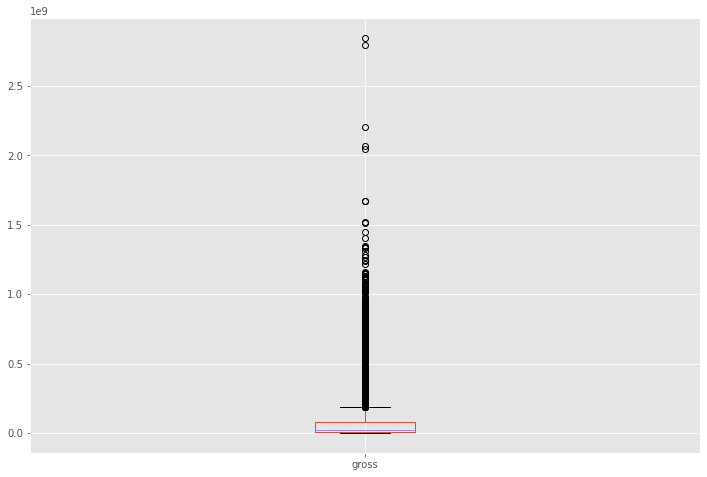

In [12]:
pd.set_option('display.max_rows',None)
df.sort_values(by=['gross'], inplace=False, ascending=False)

# Are there any Outliers?

df.boxplot(column=['gross'])


df.drop_duplicates()
df.head()

The column most correlated with 'gross' is 'budget' with a correlation of 0.7112703466796708


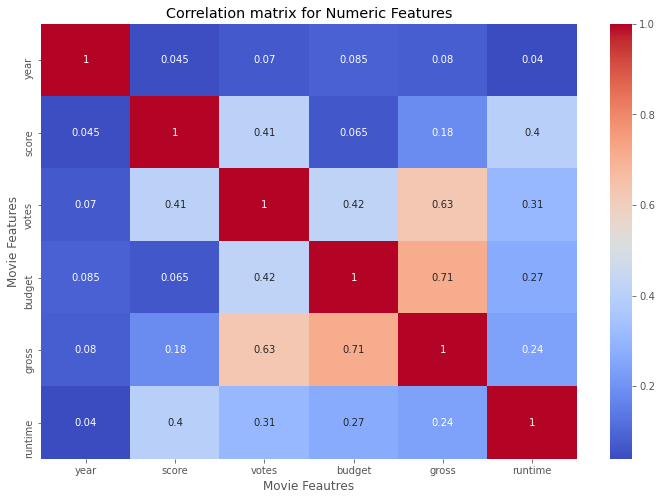

,year,score,votes,budget,gross,runtime
year,1.000000,0.045458,0.070278,0.084712,0.080115,0.039576
score,0.045458,1.000000,0.409182,0.064554,0.182868,0.399384
votes,0.070278,0.409182,1.000000,0.421007,0.628713,0.309168
budget,0.084712,0.064554,0.421007,1.000000,0.711270,0.265289
gross,0.080115,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.039576,0.399384,0.309168,0.265289,0.241336,1.000000


In [8]:
# Calculate the Correlation Matrix
correlation_matrix = df.corr()

# Check if there is any correlation with 'gross' column
gross_correlation = correlation_matrix['gross']

# Identify the most significantly correlated column (positive or negative)
most_correlated_column = gross_correlation.drop('gross').idxmax()

# Print the result
if gross_correlation[most_correlated_column] != 0:
    print(f"The column most correlated with 'gross' is '{most_correlated_column}' "
          f"with a correlation of {gross_correlation[most_correlated_column]}")
else:
    print("No significant correlation with 'gross' found.")
    
# Visualize the correlation matrix as a heatmap    
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Feautres')
plt.ylabel('Movie Features')
plt.show()

# Correlation Matrix between all numeric columns
df.corr(method ='pearson')

In [9]:
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

Top Correlations with Gross Earnings:
gross                                              1.000000
budget                                             0.715201
votes                                              0.659692
company_Lucasfilm                                  0.462352
name_Star Wars: Episode VII - The Force Awakens    0.462352
Name: gross, dtype: float64


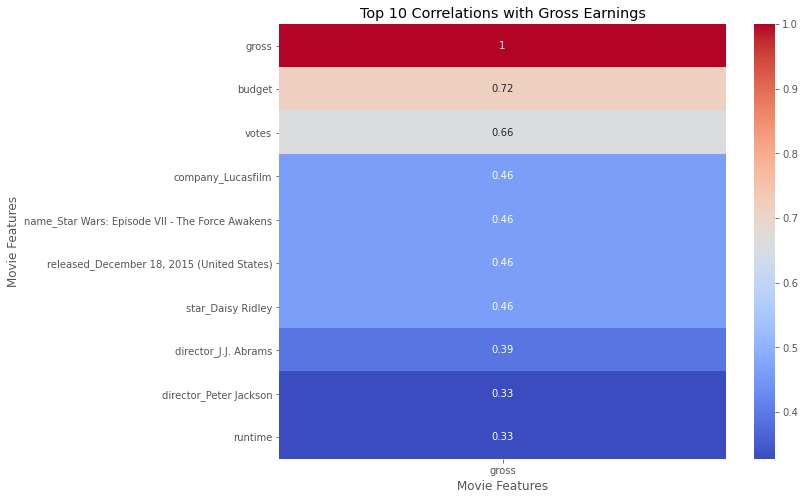

In [14]:
#one-hot encoding approach to find the correlation between the 'object' type columns

# Sample a portion of Movies dataset (10%)
sampled_df = df.sample(frac=0.1, random_state=42)

# Identify and one-hot encode 'object' columns

object_columns = sampled_df.select_dtypes(include=['object'])
df_encoded = pd.get_dummies(sampled_df, columns=object_columns.columns)

# Calculate the correlation matrix
correlation_matrix_encoded = df_encoded.corr()

# Extract the correlation with 'gross' column
gross_correlation_encoded = correlation_matrix_encoded['gross'].sort_values(ascending=False)

# Display the first few rows of gross_correlation_encoded
print("Top Correlations with Gross Earnings:")
print(gross_correlation_encoded.head())

# Visualization (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_encoded[['gross']].sort_values(by='gross', ascending=False).head(10),
            annot=True, cmap='coolwarm')
plt.title('Top 10 Correlations with Gross Earnings')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# Check if there is any correlation with 'gross' column
most_correlated_column_encoded = gross_correlation_encoded.drop('gross').idxmax()


In [16]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted


company
Warner Bros.                 56569922347
Universal Pictures           52592689431
Columbia Pictures            43008941346
Paramount Pictures           40572107956
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9387231187
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [17]:
# total gross revenue for each company in each year
# It provides insights into how the gross revenue of movies produced by different companies varies over the years.
df.groupby(['company', 'year'])[['gross']].sum()


,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2020,193457467
.406 Production,1997,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


In [19]:
# Grouping the  DataFrame by 'company' and 'year' and calculating the sum of 'gross' for each group
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

# Sorting the grouped data by 'gross', 'company', and 'year' in descending order
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross', 'company', 'year'], ascending=False)

# Selecting the 'gross' column and converting it to integers
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')

# Displaying the top 15 combinations of company and year with the highest total gross revenue
CompanyGrossSumSorted.head(15)



company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3168551343
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2019    2932757449
                       2006    2918469353
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
                       2005    2773019821
Name: gross, dtype: int64

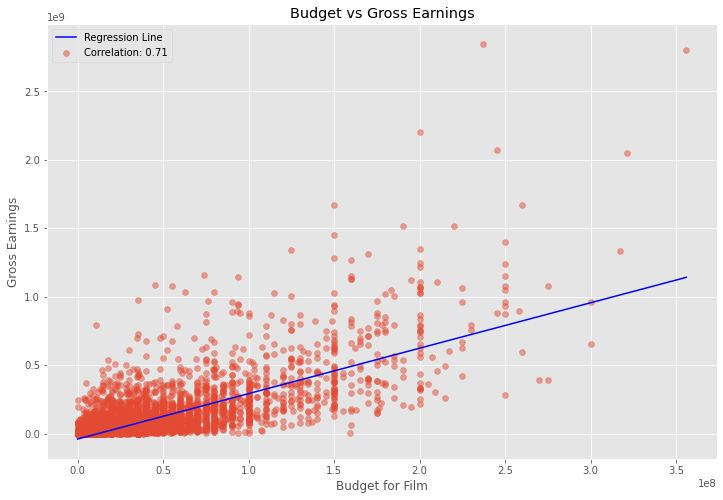

In [23]:
# Calculate the correlation coefficient
correlation_coefficient = df['budget'].corr(df['gross'])

# Create the scatter plot
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5, label=f'Correlation: {correlation_coefficient:.2f}')

# Plot the regression line in blue
plt.plot(np.unique(df['budget']), np.poly1d(np.polyfit(df['budget'], df['gross'], 1))(np.unique(df['budget'])), color='blue', label='Regression Line')

# Title of the plot
plt.title('Budget vs Gross Earnings')

# X-axis label
plt.xlabel('Budget for Film')

# Y-axis label
plt.ylabel('Gross Earnings')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
#insights into how movie ratings relate to their financial success
#display individual data points for each movie
#visualization of how movies' gross earnings are distributed within each rating category.
sns.swarmplot(x="rating", y="gross", data=df)

#visualize the density and distribution of data points for each category.
sns.stripplot(x="rating", y="gross", data=df)

